# NBDC Pipeline Buoy Data

This file cleans and concatenates buoy data for the Pipeline Buoy from the National Buoy Data Center (NBDC).

Each year of data has its own file, and missing values are expressed differently for each column.

Dates are separated into year, month, day, hour and minute columns.

**Dates are in UTC, must be changed to Hawaii time for consistency with scores data.**

## Imports

In [7]:
import pandas as pd
import numpy as np

## NOAA raw data

Get one file first to clean and then repeat process.

### First file 2008

In [8]:
# Read in csv, skip second row, has units
waimea2008 = pd.read_csv("../data/noaa/51201h2008.csv", skiprows=[1])


In [9]:
# 999, 99, 9999  etc are missing values
waimea2008.head()

,#YY,MM,DD,hh,mm,WDI,R WSP,D GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2008,1,1,0,0,999,99,99,2.1,9.0,99.0,999,9999,999,24.6,999,99,99
1,2008,1,1,1,0,999,99,99,2.5,9.0,99.0,999,9999,999,24.6,999,99,99
2,2008,1,1,2,0,999,99,99,2.5,11.0,99.0,999,9999,999,24.6,999,99,99
3,2008,1,1,3,0,999,99,99,2.8,11.0,99.0,999,9999,999,24.6,999,99,99
4,2008,1,1,4,0,999,99,99,2.9,11.0,99.0,999,9999,999,24.7,999,99,99


In [10]:
# Columns of missing data have only one value: 99, 9999, etc. Add column names to list to drop them
nan_cols = []
for col in waimea2008.columns:
    if len(waimea2008[col].value_counts()) == 1 and col != '#YY':
        nan_cols.append(col)

nan_cols

['WDI', 'R WSP', 'D GST', 'PRES', 'ATMP', 'DEWP', 'VIS', 'TIDE']

In [11]:
waimea2008.drop(columns=nan_cols)

,#YY,MM,DD,hh,mm,WVHT,DPD,APD,MWD,WTMP
0,2008,1,1,0,0,2.10,9.00,99.00,999,24.6
1,2008,1,1,1,0,2.50,9.00,99.00,999,24.6
2,2008,1,1,2,0,2.50,11.00,99.00,999,24.6
3,2008,1,1,3,0,2.80,11.00,99.00,999,24.6
4,2008,1,1,4,0,2.90,11.00,99.00,999,24.7
...,...,...,...,...,...,...,...,...,...,...
13020,2008,12,31,21,49,1.67,14.29,9.11,340,24.7
13021,2008,12,31,22,19,1.61,15.38,9.05,325,25.1
13022,2008,12,31,22,49,1.57,15.38,8.51,329,25.3
13023,2008,12,31,23,19,1.55,12.50,8.45,349,25.1


### Repeat for all files

In [12]:
# Repeat process for yearly data files
df_list = []
for year in range(2008, 2023):
    if year == 2020:
        continue
    df = pd.read_csv(f"../data/noaa/51201h{year}.csv", skiprows=[1])
    nan_cols = []
    for col in df.columns:
        if len(df[col].value_counts()) == 1 and col != '#YY':
            nan_cols.append(col)
    df.drop(columns=nan_cols, inplace=True)
    df_list.append(df)

noaa = pd.concat(df_list)

In [13]:
noaa

,#YY,MM,DD,hh,mm,WVHT,DPD,APD,MWD,WTMP
0,2008,1,1,0,0,2.1,9.0,99.0,999,24.6
1,2008,1,1,1,0,2.5,9.0,99.0,999,24.6
2,2008,1,1,2,0,2.5,11.0,99.0,999,24.6
3,2008,1,1,3,0,2.8,11.0,99.0,999,24.6
4,2008,1,1,4,0,2.9,11.0,99.0,999,24.7
...,...,...,...,...,...,...,...,...,...,...
2188,2022,1,24,2,26,2.3,15.0,9.6,288,25.3
2189,2022,1,24,1,56,2.3,14.0,9.4,318,25.3
2190,2022,1,24,1,26,2.5,15.0,10.2,297,25.3
2191,2022,1,24,0,56,2.5,14.0,9.8,311,25.3


### Drop water temperature feature per EDA findings

In [14]:
noaa.drop(columns="WTMP", inplace=True)


### Missing values

In [15]:
# Visually inspect for missing values, expecting 99., 999, 9999, etc
for col in noaa.columns:
    print(col, noaa[col].unique())

#YY [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2021 2022]
MM [ 1  2  3  4  5  6  7  8  9 11 12 10]
DD [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
hh [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
mm [ 0  7 37 36  6 35  5 19 49 50 20 21 51  3 33 42 12 13 44 43 25 14 45 54
 55 15 24 56 57 26 58 27 22 52  4 34 32  2]
WVHT [ 2.1   2.5   2.8   2.9   3.1   3.2   3.    3.4   3.5   2.7   2.4   2.3
  2.2   2.    2.6   1.9   1.8   1.7   1.6   1.5   1.4   1.2   1.3   1.
  1.1   0.9   0.8   3.9   3.3   4.4   3.8   4.2   4.    3.6   4.1   5.4
  4.9   5.5   6.1   5.    4.7   4.5   4.3   2.38  2.39  2.28  2.35  2.26
  2.34  2.36  2.23  2.16  2.01  2.17  2.19  2.04  2.05  2.08  2.06  2.12
  2.24  2.13  2.07  2.03  2.22  1.88  2.11  2.14  1.99  2.25  2.02  1.96
  1.98  1.92  1.93  1.95  1.97  1.91  1.94  2.15  2.21  2.18  2.29  2.31
  2.37  2.33  2.43  2.48  2.53  2.52  2.49  2.51  2.59  2.56  2.46  2.54
  

#### From output text file, these are problem values:
- 'WVHT' -> 99.
- 'DPD' -> 99.
- 'APD' -> 99., ..., '5.6', 'MM' **strings**
- 'MWD' -> 999

### Discard missing values

In [16]:
noaa = noaa[
    (noaa["WVHT"] != 99.0)
    & (noaa["DPD"] != 99.0)
    & (noaa["APD"] != 99.0)
    & (noaa["APD"] != "...")
    & (noaa["APD"] != "MM")
    & (noaa["MWD"] != 999)
]


In [17]:
noaa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200016 entries, 708 to 2192
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   #YY     200016 non-null  int64  
 1   MM      200016 non-null  int64  
 2   DD      200016 non-null  int64  
 3   hh      200016 non-null  int64  
 4   mm      200016 non-null  int64  
 5   WVHT    200016 non-null  float64
 6   DPD     200016 non-null  float64
 7   APD     200016 non-null  object 
 8   MWD     200016 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 15.3+ MB


### Fix dtypes

APD needs to be float. MWD needs to be int.

In [18]:
noaa['APD'] = noaa['APD'].astype(float)
noaa['MWD'] = noaa['MWD'].astype(int)

/var/folders/p1/89v2vyg94jd0blrmm4w41wr00000gn/T/ipykernel_10315/1617519595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noaa['APD'] = noaa['APD'].astype(float)
/var/folders/p1/89v2vyg94jd0blrmm4w41wr00000gn/T/ipykernel_10315/1617519595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noaa['MWD'] = noaa['MWD'].astype(int)


In [19]:
# Sanity check
noaa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200016 entries, 708 to 2192
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   #YY     200016 non-null  int64  
 1   MM      200016 non-null  int64  
 2   DD      200016 non-null  int64  
 3   hh      200016 non-null  int64  
 4   mm      200016 non-null  int64  
 5   WVHT    200016 non-null  float64
 6   DPD     200016 non-null  float64
 7   APD     200016 non-null  float64
 8   MWD     200016 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 15.3 MB


### Human readable column names

In [20]:
# Rename columns for ease of use.
noaa.rename(
    columns={
        "WVHT": "wave_height",
        "DPD": "dominant_period",
        "APD": "avg_period",
        "MWD": "dominant_wave_direction",
    },
    inplace=True,
)


/Users/andresperez/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### Date conversions

Convert date columns to strings and add '0' where necessary.

In [21]:
noaa['MM'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 10])

In [22]:
noaa["MM"] = noaa["MM"].map(lambda x: "0" + str(x) if len(str(x)) == 1 else str(x))
noaa["MM"].unique()


/var/folders/p1/89v2vyg94jd0blrmm4w41wr00000gn/T/ipykernel_10315/123901343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noaa["MM"] = noaa["MM"].map(lambda x: "0" + str(x) if len(str(x)) == 1 else str(x))


array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '11', '12',
       '10'], dtype=object)

In [23]:
noaa["DD"] = noaa["DD"].map(lambda x: "0" + str(x) if len(str(x)) == 1 else str(x))
noaa['DD'].unique()

/var/folders/p1/89v2vyg94jd0blrmm4w41wr00000gn/T/ipykernel_10315/3494463864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noaa["DD"] = noaa["DD"].map(lambda x: "0" + str(x) if len(str(x)) == 1 else str(x))


array(['30', '31', '01', '02', '03', '04', '05', '06', '07', '08', '09',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29'], dtype=object)

In [24]:
noaa["hh"] = noaa["hh"].map(lambda x: "0" + str(x) if len(str(x)) == 1 else str(x))
noaa['hh'].unique()

/var/folders/p1/89v2vyg94jd0blrmm4w41wr00000gn/T/ipykernel_10315/999454686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noaa["hh"] = noaa["hh"].map(lambda x: "0" + str(x) if len(str(x)) == 1 else str(x))


array(['18', '19', '20', '21', '22', '23', '00', '01', '02', '03', '04',
       '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15',
       '16', '17'], dtype=object)

In [25]:
noaa["mm"] = noaa["mm"].map(lambda x: "0" + str(x) if len(str(x)) == 1 else str(x))
noaa['mm'].unique()

/var/folders/p1/89v2vyg94jd0blrmm4w41wr00000gn/T/ipykernel_10315/732983945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noaa["mm"] = noaa["mm"].map(lambda x: "0" + str(x) if len(str(x)) == 1 else str(x))


array(['07', '37', '36', '06', '35', '05', '19', '49', '50', '20', '21',
       '51', '03', '33', '42', '12', '13', '44', '43', '25', '14', '45',
       '54', '55', '15', '24', '56', '57', '26', '58', '27', '22', '52',
       '04', '34', '32', '02', '00'], dtype=object)

### Create a date column with correct format from other cols.

In [26]:
# Create a date column with the format '2018-10-26 12:00'
noaa["date"] = (
    "'"
    + noaa["#YY"].astype(str)
    + '-'
    + noaa["MM"].astype(str)
    + '-'
    + noaa["DD"].astype(str)
    + ' '
    + noaa["hh"].astype(str)
    + ':'
    + noaa["mm"].astype(str)
    + "'"
)


/var/folders/p1/89v2vyg94jd0blrmm4w41wr00000gn/T/ipykernel_10315/615739795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noaa["date"] = (


In [27]:
noaa.head()

,#YY,MM,DD,hh,mm,wave_height,dominant_period,avg_period,dominant_wave_direction,date
708,2008,01,30,18,07,2.16,9.88,7.50,41,'2008-01-30 18:07'
709,2008,01,30,18,37,2.20,9.09,6.96,37,'2008-01-30 18:37'
710,2008,01,30,19,07,2.30,14.29,7.04,307,'2008-01-30 19:07'
711,2008,01,30,19,37,2.01,14.29,6.61,310,'2008-01-30 19:37'
712,2008,01,30,20,07,2.17,8.33,6.64,38,'2008-01-30 20:07'


In [28]:
noaa.tail()

,#YY,MM,DD,hh,mm,wave_height,dominant_period,avg_period,dominant_wave_direction,date
2188,2022,01,24,02,26,2.3,15.0,9.6,288,'2022-01-24 02:26'
2189,2022,01,24,01,56,2.3,14.0,9.4,318,'2022-01-24 01:56'
2190,2022,01,24,01,26,2.5,15.0,10.2,297,'2022-01-24 01:26'
2191,2022,01,24,00,56,2.5,14.0,9.8,311,'2022-01-24 00:56'
2192,2022,01,24,00,26,2.3,14.0,9.4,308,'2022-01-24 00:26'


### Convert date column to datetime format

In [29]:
# With help from https://stackoverflow.com/questions/32344533/how-do-i-round-datetime-column-to-nearest-quarter-hour
# Round to nearest half hour
# Subtract 10 hours to convert from UTC to Hawaii time

noaa["date"] = pd.to_datetime(noaa["date"]).dt.round("30min") - pd.DateOffset(hours=10)  
noaa.drop(columns=["#YY", "MM", "DD", "hh", "mm"], inplace=True)


/var/folders/p1/89v2vyg94jd0blrmm4w41wr00000gn/T/ipykernel_10315/118022225.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noaa["date"] = pd.to_datetime(noaa["date"]).dt.round("30min") - pd.DateOffset(hours=10)
/Users/andresperez/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
noaa.head()

,wave_height,dominant_period,avg_period,dominant_wave_direction,date
708,2.16,9.88,7.50,41,2008-01-30 08:00:00
709,2.20,9.09,6.96,37,2008-01-30 08:30:00
710,2.30,14.29,7.04,307,2008-01-30 09:00:00
711,2.01,14.29,6.61,310,2008-01-30 09:30:00
712,2.17,8.33,6.64,38,2008-01-30 10:00:00


In [31]:
noaa.tail()

,wave_height,dominant_period,avg_period,dominant_wave_direction,date
2188,2.3,15.0,9.6,288,2022-01-23 16:30:00
2189,2.3,14.0,9.4,318,2022-01-23 16:00:00
2190,2.5,15.0,10.2,297,2022-01-23 15:30:00
2191,2.5,14.0,9.8,311,2022-01-23 15:00:00
2192,2.3,14.0,9.4,308,2022-01-23 14:30:00


### Sort by date and move to index

In [32]:
noaa.sort_values(by='date', inplace=True)

/Users/andresperez/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [33]:
noaa.set_index('date', inplace=True)

### Since we only have competition dates from 2014 on, keep those dates only. This also fixes the sampling frequency to ~30 min

In [34]:
noaa = noaa[noaa.index.year > 2013]

### Visual check

There are some gaps with no buoy data.

<AxesSubplot:xlabel='date'>

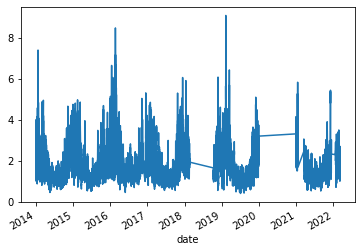

In [35]:
noaa['wave_height'].plot()

In [36]:
noaa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 106152 entries, 2014-01-01 00:00:00 to 2022-03-10 06:30:00
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   wave_height              106152 non-null  float64
 1   dominant_period          106152 non-null  float64
 2   avg_period               106152 non-null  float64
 3   dominant_wave_direction  106152 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 4.0 MB


### Replace wave direction with sin and cos columns for modeling

In [37]:
# With help from
# https://dax-nb-preview-prod.s3.us.cloud-object-storage.appdomain.cloud/jfk-weather-data/Part%201%20-%20Data%20Cleaning.html#2.6-Feature-encoding

noaa['dominant_wave_direction_sin'] = np.sin(noaa['dominant_wave_direction']*(2.*np.pi/360))
noaa['dominant_wave_direction_cos'] = np.cos(noaa['dominant_wave_direction']*(2.*np.pi/360))

# Drop original wave direction column
noaa.drop(columns='dominant_wave_direction', inplace=True)

### Create time shifts

Wave conditions measured by the buoy create waves onshore hours after they pass the buoy. To take this into account when modeling, we create 3, 6, 9 and 12 hour shifted data.

This is a big area of opportunity for further exploration, calculating the time to shore is a function of wave period and size.

In [38]:
# 3 hour shift
noaa.shift(6).rename(columns={'wave_height': 'wave_height_3_h'})

,wave_height_3_h,dominant_period,avg_period,dominant_wave_direction_sin,dominant_wave_direction_cos
date,,,,,
2014-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
2014-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:30:00,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:30:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-03-10 04:30:00,1.3,11.0,7.1,-0.139173,0.990268
2022-03-10 05:00:00,1.3,10.0,6.8,-0.069756,0.997564
2022-03-10 05:30:00,1.3,12.0,7.2,-0.484810,0.874620


In [39]:
# Create sets of shifted data and concatenate them with our original data
shifts = [2, 3, 6, 12, 18]
df_list = []
for shift in shifts:
    noaa_shifted = noaa.shift(shift).rename(
        columns={
            "wave_height": f"wave_height_{shift/2}_h",
            "dominant_period": f"dominant_period_{shift/2}_h",
            "avg_period": f"avg_period_{shift/2}_h",
            "dominant_wave_direction_sin": f"dominant_wave_direction_sin_{shift/2}_h",
            "dominant_wave_direction_cos": f"dominant_wave_direction_cos_{shift/2}_h",
        }
    )
    df_list.append(noaa_shifted)

noaa_shifted = pd.concat([noaa, pd.concat(df_list, axis=1)], axis=1)
noaa_shifted


,wave_height,dominant_period,avg_period,dominant_wave_direction_sin,dominant_wave_direction_cos,wave_height_1.0_h,dominant_period_1.0_h,avg_period_1.0_h,dominant_wave_direction_sin_1.0_h,dominant_wave_direction_cos_1.0_h,...,wave_height_6.0_h,dominant_period_6.0_h,avg_period_6.0_h,dominant_wave_direction_sin_6.0_h,dominant_wave_direction_cos_6.0_h,wave_height_9.0_h,dominant_period_9.0_h,avg_period_9.0_h,dominant_wave_direction_sin_9.0_h,dominant_wave_direction_cos_9.0_h
date,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,1.48,11.11,7.91,-0.656059,0.754710,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 00:30:00,1.53,11.76,8.05,-0.656059,0.754710,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:30:00,1.57,10.53,7.89,-0.573576,0.819152,1.48,11.11,7.91,-0.656059,0.754710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,1.51,11.76,7.85,-0.573576,0.819152,1.53,11.76,8.05,-0.656059,0.754710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:30:00,1.43,8.33,7.54,-0.121869,0.992546,1.57,10.53,7.89,-0.573576,0.819152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-10 04:30:00,1.20,12.00,7.70,-0.292372,0.956305,1.20,9.00,7.00,0.000000,1.000000,...,1.2,13.0,7.9,-0.406737,0.913545,1.4,12.0,8.1,-0.469472,0.882948
2022-03-10 05:00:00,1.20,12.00,7.40,-0.515038,0.857167,1.20,11.00,7.10,-0.292372,0.956305,...,1.3,11.0,8.1,-0.358368,0.933580,1.5,13.0,8.5,-0.422618,0.906308
2022-03-10 05:30:00,1.30,9.00,7.50,0.224951,0.974370,1.20,12.00,7.70,-0.292372,0.956305,...,1.3,13.0,7.9,-0.515038,0.857167,1.5,10.0,8.1,0.034899,0.999391


## Save clean and merged buoy data to merge with scores for modeling

In [40]:
noaa_shifted.to_csv('../data/noaa/pipeline_buoy_full_shifted.csv')